In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset1 = pd.read_csv('DATA.csv')
dataset1.columns = ['Input', 'Output']
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [6]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1, 16)
        self.hidden2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [7]:
janani_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(janani_brain.parameters(), lr=0.01)

In [8]:
def train_model(janani_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(1, epochs + 1):
        optimizer.zero_grad()
        outputs = janani_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        janani_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [9]:
train_model(janani_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [200/2000], Loss: 72.361969
Epoch [400/2000], Loss: 3.062832
Epoch [600/2000], Loss: 2.742714
Epoch [800/2000], Loss: 2.687202
Epoch [1000/2000], Loss: 2.687129
Epoch [1200/2000], Loss: 2.687121
Epoch [1400/2000], Loss: 2.687127
Epoch [1600/2000], Loss: 2.687127
Epoch [1800/2000], Loss: 2.687129
Epoch [2000/2000], Loss: 2.687127


In [10]:
with torch.no_grad():
    test_loss = criterion(janani_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 9.118316


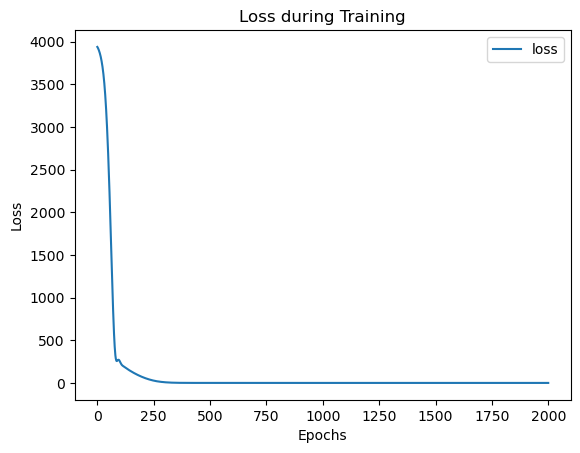

In [11]:
import matplotlib.pyplot as plt
loss_df = pd.DataFrame(janani_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [12]:
X_n1_1 = torch.tensor([[7]], dtype=torch.float32)
prediction = janani_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction:.4f}')

Prediction: 40.0836
